In [17]:
import os

# data frame basics
import pandas as pd
import numpy as np
from sklearn.externals import joblib

# visualization basics
import matplotlib.pyplot as plt
import seaborn as sns

# math basics
from math import log
from scipy import stats, linalg

# Scikit learn Models and Selector Algos
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Scikit learn metrics and reporting
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc, recall_score

# stuff to change, process, oversample data
from sklearn import preprocessing 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pickle
import warnings
warnings.filterwarnings('ignore')

#NLTK stuff
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF



%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

In [5]:
#Loading the cleaned dataset

df_full = joblib.load('/Users/shwetapai/Desktop/final_full_dataset.pkl')

In [6]:
df_full.head()

,index,num_sents,num_words,num_all_caps,percent_all_caps,num_exclms,percent_exclms,num_imp_words,percent_imp_words,avg_words_per_sent,...,normalized_text,name,category,hyperlink,currency,pledged,goal,location,funded,sentiment
0,2,54.0,1147.0,2.0,0.001744,2.0,0.001744,1.0,0.000872,21.240741,...,It is the numbrst century! Flying cars and tim...,LoadAUF - The Autonomous User Follower,Robots,https://www.kickstarter.com/projects/154469338...,USD,49.0,3000.0,"Miami, FL",False,0.9986
1,3,63.0,1051.0,10.0,0.009515,4.0,0.003806,0.0,0.000000,16.682540,...,"httpaddr Hello, I'm Aryn Sparks, inventor of p...",Project RoBro- The learning raspberry pi brain!,Robots,https://www.kickstarter.com/projects/192623886...,USD,5.5,25000.0,"San Angelo, TX",False,0.9979
2,4,136.0,2146.0,16.0,0.007456,1.0,0.000466,0.0,0.000000,15.779412,...,There are a lot of robots in the world. But mo...,Jerry: An Affordable Personal Robot,Robots,https://www.kickstarter.com/projects/slantrobo...,USD,3290.0,20000.0,"Boise, ID",False,0.9996
3,7,77.0,1006.0,13.0,0.012922,7.0,0.006958,0.0,0.000000,13.064935,...,Omorobot OMOROBOT is a small venture company...,DonkiBot,Robots,https://www.kickstarter.com/projects/235508607...,USD,6835.0,500000.0,"Germantown, MD",False,0.9992
4,8,29.0,636.0,3.0,0.004717,1.0,0.001572,0.0,0.000000,21.931034,...,"Robotics in industry, education, and personal ...",The G.E.N.E.S.I.S. Robotics Platform,Robots,https://www.kickstarter.com/projects/rickrobot...,USD,156.0,50000.0,"Waverly, IA",False,0.9861


In [7]:
df_full.columns

Index(['index', 'num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded', 'normalized_text',
       'name', 'category', 'hyperlink', 'currency', 'pledged', 'goal',
       'location', 'funded', 'sentiment'],
      dtype='object')

**DATA PREPARATION**

In [9]:
features=['num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
       'num_exclms', 'percent_exclms', 'num_imp_words', 'percent_imp_words',
       'avg_words_per_sent', 'num_paragraphs', 'avg_sents_per_paragraph',
       'avg_words_per_paragraph', 'num_images', 'num_videos', 'num_youtubes',
       'num_hyperlinks', 'num_bolded', 'percent_bolded','sentiment']

#making a dataset with only features listed above

X = df_full[features]
X.head()

,num_sents,num_words,num_all_caps,percent_all_caps,num_exclms,percent_exclms,num_imp_words,percent_imp_words,avg_words_per_sent,num_paragraphs,avg_sents_per_paragraph,avg_words_per_paragraph,num_images,num_videos,num_youtubes,num_hyperlinks,num_bolded,percent_bolded,sentiment
0,54.0,1147.0,2.0,0.001744,2.0,0.001744,1.0,0.000872,21.240741,28.0,2.428571,40.392857,2.0,1.0,0.0,0.0,0.0,0.000000,0.9986
1,63.0,1051.0,10.0,0.009515,4.0,0.003806,0.0,0.000000,16.682540,42.0,1.857143,25.357143,4.0,0.0,0.0,4.0,0.0,0.000000,0.9979
2,136.0,2146.0,16.0,0.007456,1.0,0.000466,0.0,0.000000,15.779412,82.0,2.000000,25.512195,18.0,1.0,3.0,3.0,40.0,0.018639,0.9996
3,77.0,1006.0,13.0,0.012922,7.0,0.006958,0.0,0.000000,13.064935,47.0,1.595745,20.638298,34.0,11.0,0.0,0.0,0.0,0.000000,0.9992
4,29.0,636.0,3.0,0.004717,1.0,0.001572,0.0,0.000000,21.931034,10.0,3.100000,62.600000,2.0,0.0,0.0,1.0,0.0,0.000000,0.9861


**Loading Helper Functions**

In [14]:
#creating n-grams for 'normalized text'section after preprocessing the section
import re
import unicodedata
from sklearn.feature_extraction import text 

import re
import unicodedata

def remove_punc(text):
    """Remove all punctuation from the text of a campaign section
    
    Args:
        text (str): cleaned and normalized text of a campaign section
    
    Returns:
        a string containing the text of a campaign section without any
        punctuation"""
    
    # Remove punctuation with regex
    return re.sub(r'[^\w\d\s]|\_', ' ', text)


def preprocess_text(text):
    """Perform text preprocessing such as removing punctuation, lowercasing all
    words, removing stop words and stemming remaining words
    
    Args:
        text (str): cleaned and normalized text of a campaign section
    
    Returns:
        a string containing text that has been preprocessed"""
    
    # Access stop word dictionary
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Prepare the Porter stemmer
    porter = nltk.PorterStemmer()
    
    # Remove punctuation and lowercase each word
    text = remove_punc(text).lower()
    
    # Remove stop words and stem each word
    return ' '.join(
        porter.stem(term )
        for term in text.split()
        if term not in stop_words
    )


**Topic Modeling for column 'normalized_text'**

In [18]:
#preprocessing the 'normalized text section'

preprocessed_text = df_full.loc[X.index, 'normalized_text'].apply(preprocess_text)


#use vectorizer on the preprocessed text
vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=250)


X_ngrams = vectorizer.fit_transform(preprocessed_text)
X_ngrams

#Using NMF to get 20 topics from X_ngrams
from sklearn.decomposition import NMF

no_topics = 20

# Run NMF
nmf=NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf_matrix = nmf.fit_transform(X_ngrams)


In [19]:
tfidf_feature_names = vectorizer.get_feature_names()

In [20]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d"),(topic_idx)
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
no_top_words = 20
display_topics(nmf, tfidf_feature_names, no_top_words)

**Combining Topics with other meta-features**

In [22]:
from scipy import sparse
#Convert the meta features into a sparse matrix
X_sparse = sparse.csr_matrix(X)

# Concatenate the meta features with the n-grams
X_full = sparse.hstack([X_sparse, nmf_matrix])

# Display the shape of the combined matrix for confirmation
X_full.shape

(5802, 39)

In [23]:
X_full_dense=X_full.todense()

In [24]:
scaler = StandardScaler()
X_full_std = scaler.fit_transform(X_full_dense)

**Traget Variable**

In [26]:
# Prepare the classification target variable
y = df_full.loc[X.index, 'funded'].to_frame()

In [27]:
# Display the class distribution
y['funded'].value_counts()

True     3186
False    2616
Name: funded, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode the class labels in the target variable
le = LabelEncoder()
y_enc = le.fit_transform(y.values.ravel())

**Splitting the Datset**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full_std, y_enc, test_size=0.25, random_state=42)

**MODEL TESTING**

**Quick Model Classifier**

In [32]:
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params,n_jobs=-1)
    grid.fit(X_train, y_train)
    s = f"{name}: best score: {grid.best_score_}"
    print(s)
    grids[name] = grid

knn: best score: 0.6761663985290738
logistic: best score: 0.7097219030108021
tree: best score: 0.6557113307285681
forest: best score: 0.7037462652263847


In [33]:
#Let's get the testing score

print(grids['knn'].best_estimator_.score(X_test, y_test))
print(grids['logistic'].best_estimator_.score(X_test, y_test))
print(grids['tree'].best_estimator_.score(X_test, y_test))
print(grids['forest'].best_estimator_.score(X_test, y_test))

0.6836664369400414
0.7015851137146796
0.6643694004135079
0.6940041350792557


**Observation**

As the testing scores are almost the same, I will focus on two models (Random Forest Classifier and Logistic Regression).

**Random Forest Classifier**

In [35]:
RSEED = 0
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
randomforest = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, scoring = 'roc_auc', cv = 5, n_iter = 10, verbose = 0, random_state=RSEED)


# Fit 
randomforest.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, ...9, 49, 49, 49, 49, 49, 49, 49, 49, 50], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs

In [36]:
params = randomforest.best_params_
params

{'n_estimators': 83,
 'min_samples_split': 2,
 'max_leaf_nodes': 38,
 'max_features': 0.7,
 'max_depth': 6,
 'bootstrap': True}

In [38]:
best_rf = RandomForestClassifier(n_estimators = params['n_estimators'],\
                                min_samples_split = params['min_samples_split'],
                                max_leaf_nodes=params['max_leaf_nodes'],\
                                max_features=params['max_features'],\
                                max_depth=params['max_depth'],\
                                bootstrap=params['bootstrap'])
                                                             
best_rf.fit(X_train,y_train)

#Pickling the model
joblib.dump(best_rf, 'final_rfc.pkl')
print(best_rf.score(X_train,y_train))

0.7775224086416915


In [40]:
#Fitting the model

y_pred_rfc=best_rf.predict(X_test)

**Evaluating the Model**

In [41]:
from sklearn.metrics import confusion_matrix


confusion_matrix_forest = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_forest)

[[378 257]
 [176 640]]


In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

y_pred_rfc=best_rf.predict(X_test)
y_score_rfc = best_rf.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_rfc)
roc_auc_forests = auc(fpr, tpr)
print(roc_auc_forests)



0.7622915701713756


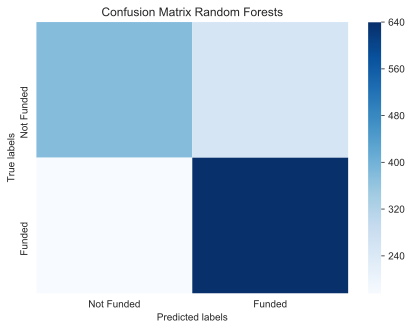

In [44]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Funded', 'Funded']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=False,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests'); 

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc)) 

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       635
           1       0.71      0.78      0.75       816

   micro avg       0.70      0.70      0.70      1451
   macro avg       0.70      0.69      0.69      1451
weighted avg       0.70      0.70      0.70      1451



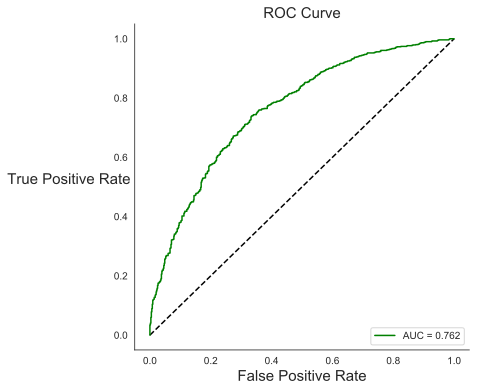

In [47]:
#Plotting AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from seaborn import despine

logit_roc_auc = roc_auc_score(y_test, best_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])

roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6,6))


# Plotting our Baseline..
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr,'g',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.title('ROC Curve',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',rotation=0,labelpad=45,fontsize = 15)
despine()

**Logistic Regression**

In [49]:
#Setup the hyperparameter grid
c_space = np.logspace(-5, 5, 10)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, n_jobs = -1)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

#examine the best model
print(logreg_cv.best_score_)
print(logreg_cv.best_params_)
print(logreg_cv.best_estimator_)
c_best = logreg_cv.best_params_

0.7055849230062055
{'C': 0.2782559402207126}
LogisticRegression(C=0.2782559402207126, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [51]:
best_lr = LogisticRegression(C=c_best['C'])
best_lr.fit(X_train, y_train)

print("The score for training is ", best_lr.score(X_train, y_train))

The score for training is  0.7150080441277867


In [54]:
#Fitting the model

y_pred_lr=best_lr.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix


confusion_matrix_forest = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_forest)

[[422 213]
 [220 596]]


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr)) 

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       635
           1       0.74      0.73      0.73       816

   micro avg       0.70      0.70      0.70      1451
   macro avg       0.70      0.70      0.70      1451
weighted avg       0.70      0.70      0.70      1451



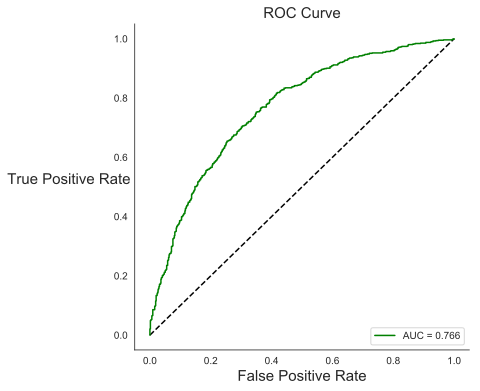

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from seaborn import despine

logit_roc_auc = roc_auc_score(y_test, best_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_lr.predict_proba(X_test)[:,1])

roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6,6))


# Plotting our Baseline..
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr,'g',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.title('ROC Curve',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',rotation=0,labelpad=45,fontsize = 15)
despine()

**Observation**

The AUC for both logistic and Random Forest is same.But the F1-score is slightly higher for Random Forest Classifier.So I am goign to select Random Forest Classifier as my final model.